In [2]:
from tensorflow.compat.v2.keras.models import model_from_json

# json 파일 열기
json_file = open('CNN_dog_cat_model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# json 파일로부터 model 로드하기
loaded_model = model_from_json(loaded_model_json)

# 로드한 model에 weight 로드하기
loaded_model.load_weights('CNN_dog_cat_model.h5')

In [3]:
# 모델 컴파일
loaded_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 요약
loaded_model.summary()

# # 모델 evaluation
# test_loss, test_acc = loaded_model.evaluate(test_X,test_y)
# print('Accuracy : {} %'.format(test_acc*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [4]:
# 필요한 패키지 import
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [8]:
# 글로벌 변수 선언
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 # 컬러 사진이므로 채널이 3(rgb)
batch_size = 15

Found 12500 validated image filenames.
Instructions for updating:
Please use Model.predict, which supports generators.


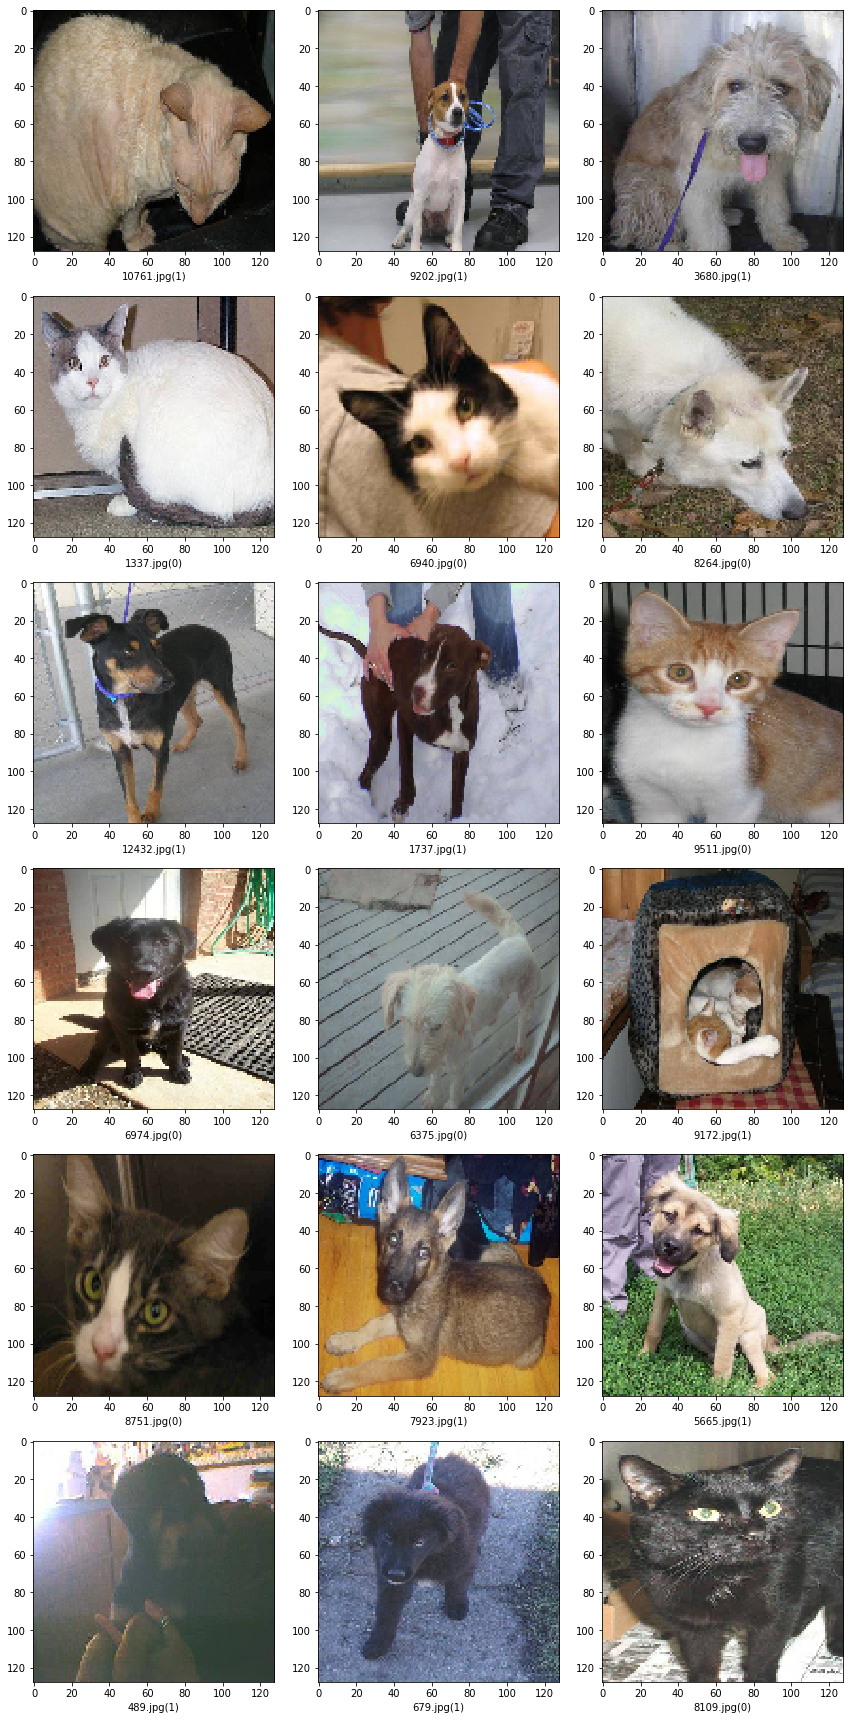

In [10]:
# Test를 해보장
test_filenames = os.listdir('./dogvscat/test1/')
test_df = pd.DataFrame({
    'filename':test_filenames
})
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    './dogvscat/test1/',
    x_col='filename',
    y_col=None,
    target_size=IMAGE_SIZE,
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

# 모델 예측
predict = loaded_model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

# 평가 생성
# 확률이 큰 걸로 라벨을 붙여준다
test_df['category'] = np.argmax(predict,axis=-1)

# 레이블 변환
# 평가를 위해서 dog,cat으로 있던걸 다시 1,0으로 변환
# print(test_df['category'])
# test_df['category'] = test_df['category'].replace({'dog':1,'cat':0})

# 정답 확인!
# 강아지는 1 고양이는 0 이다
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img('./dogvscat/test1/'+filename,target_size=IMAGE_SIZE)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + '{}'.format(category) + ')')
plt.tight_layout()
plt.show()